# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_keys 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | sidi ali
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | vao
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | kristiansund
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mikhaylovka
Processing Record 15 of Set 1 | vung tau
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | grafton
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | al

Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | adtuyon
Processing Record 43 of Set 4 | moshny
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | douglasville
Processing Record 46 of Set 4 | tixpehual
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | gongzhuling
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | sao filipe
Processing Record 1 of Set 5 | oshakati
Processing Record 2 of Set 5 | aykhal
Processing Record 3 of Set 5 | chagda
City not found. Skipping...
Processing Record 4 of Set 5 | caravelas
Processing Record 5 of Set 5 | mordovo
Processing Record 6 of Set 5 | ouesso
Processing Record 7 of Set 5 | pedernales
Processing Record 8 of Set 5 | zletovo
Processing Record 9 of Set 5 | verkhnyaya inta
Processing Record 10 of Set 5 | peleduy
Processing Record 11 of Set 5 | kutum
Processing Record 12 of Set 5 | gorom-gorom
Processing Record 13 of Set 5 | so

Processing Record 29 of Set 8 | aberdeen
Processing Record 30 of Set 8 | hamilton
Processing Record 31 of Set 8 | san vicente
Processing Record 32 of Set 8 | lukovetskiy
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | kalnibolotskaya
Processing Record 35 of Set 8 | hvide sande
Processing Record 36 of Set 8 | lolodorf
Processing Record 37 of Set 8 | kapiri mposhi
Processing Record 38 of Set 8 | asau
Processing Record 39 of Set 8 | polunochnoye
Processing Record 40 of Set 8 | batticaloa
Processing Record 41 of Set 8 | yining
Processing Record 42 of Set 8 | kanniyakumari
Processing Record 43 of Set 8 | la libertad
Processing Record 44 of Set 8 | montepuez
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | mahibadhoo
Processing Record 48 of Set 8 | fortuna
Processing Record 49 of Set 8 | coffs harbour
Processing Record 0 of Set 9 | nagyhegyes
Processing Record 1 of Set 9 | gamba
Processing Re

Processing Record 19 of Set 12 | nsanje
Processing Record 20 of Set 12 | marzuq
Processing Record 21 of Set 12 | libourne
Processing Record 22 of Set 12 | shiyan
Processing Record 23 of Set 12 | minab
Processing Record 24 of Set 12 | cuamba
Processing Record 25 of Set 12 | whithorn
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | am timan
Processing Record 28 of Set 12 | laguna
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | warqla
City not found. Skipping...
Processing Record 31 of Set 12 | sindand
City not found. Skipping...
Processing Record 32 of Set 12 | khonuu
City not found. Skipping...
Processing Record 33 of Set 12 | pionerskiy
Processing Record 34 of Set 12 | marcona
City not found. Skipping...
Processing Record 35 of Set 12 | huntsville
Processing Record 36 of Set 12 | barbacoas
Processing Record 37 of Set 12 | port hardy
Processing Record 38 of Set 12 | bull savanna
Processing Record 39 of Set 12 | rock sound
Processin

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,30.09,96,100,6.38,RU,1675304343
1,sidi ali,36.0998,0.4206,45.07,72,0,5.91,DZ,1675304343
2,busselton,-33.6500,115.3333,72.30,42,96,15.84,AU,1675304343
3,constitucion,-35.3333,-72.4167,59.95,70,0,13.20,CL,1675304211
4,cidreira,-30.1811,-50.2056,75.22,90,1,6.80,BR,1675304344


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,30.09,96,100,6.38,RU,1675304343
1,sidi ali,36.0998,0.4206,45.07,72,0,5.91,DZ,1675304343
2,busselton,-33.6500,115.3333,72.30,42,96,15.84,AU,1675304343
3,constitucion,-35.3333,-72.4167,59.95,70,0,13.20,CL,1675304211
4,cidreira,-30.1811,-50.2056,75.22,90,1,6.80,BR,1675304344


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

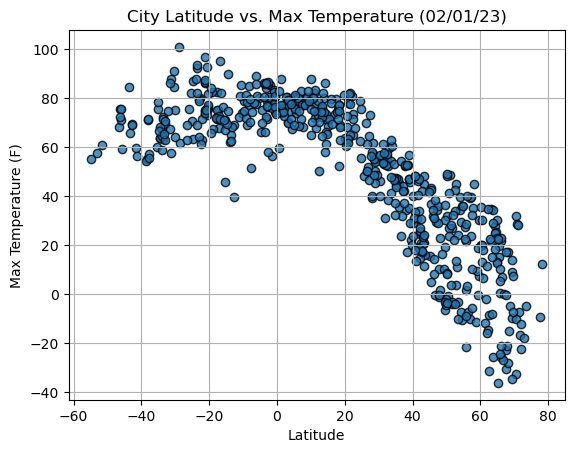

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
            lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

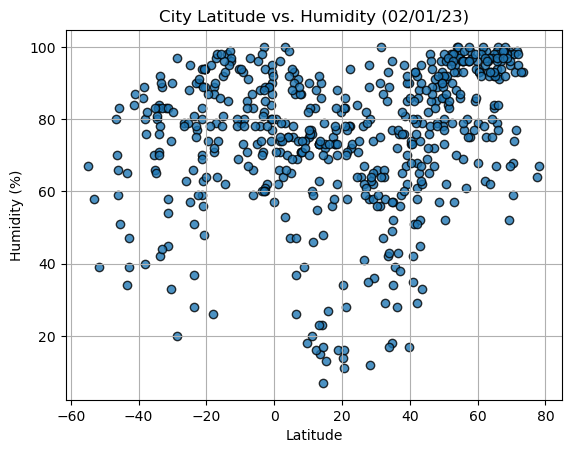

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

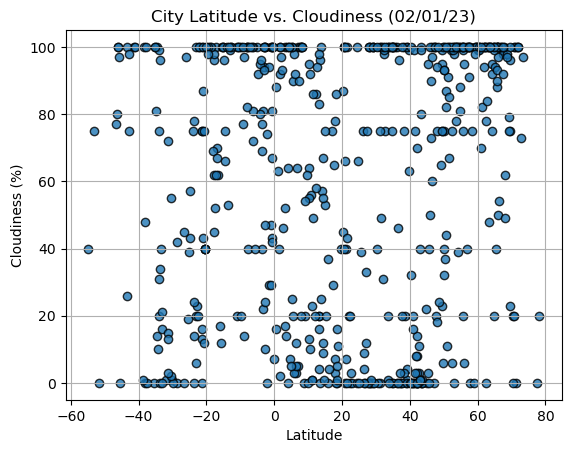

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

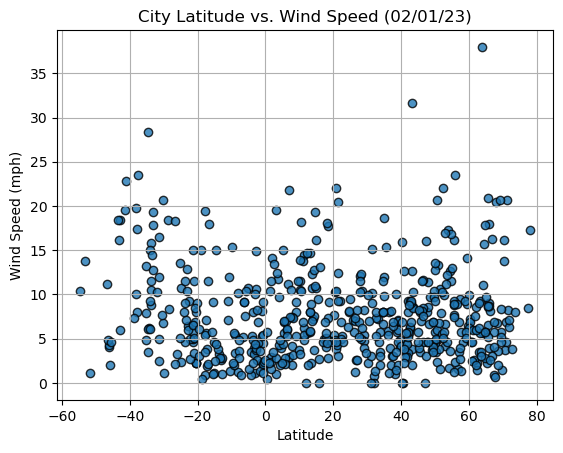

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,30.09,96,100,6.38,RU,1675304343
1,sidi ali,36.0998,0.4206,45.07,72,0,5.91,DZ,1675304343
7,barrow,71.2906,-156.7887,-7.58,77,0,20.71,US,1675304345
8,kristiansund,63.1115,7.7320,34.45,93,100,3.44,NO,1675304345
13,mikhaylovka,50.0600,43.2379,31.78,86,100,5.79,RU,1675304346


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,72.30,42,96,15.84,AU,1675304343
3,constitucion,-35.3333,-72.4167,59.95,70,0,13.20,CL,1675304211
4,cidreira,-30.1811,-50.2056,75.22,90,1,6.80,BR,1675304344
5,vao,-22.6667,167.4833,80.04,77,23,6.44,NC,1675304108
6,vaini,-21.2000,-175.2000,86.16,70,75,14.97,TO,1675304344


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8814561704069506


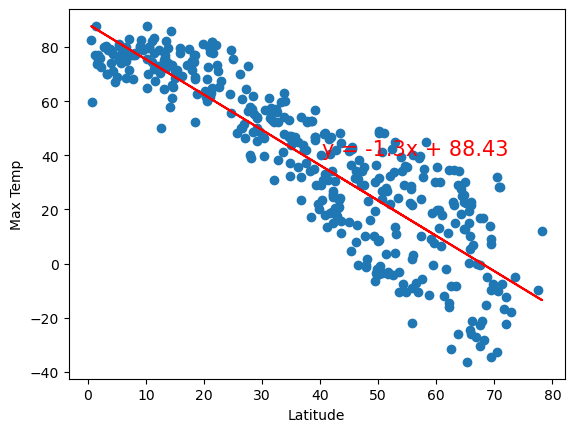

None


In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.3293330860154892


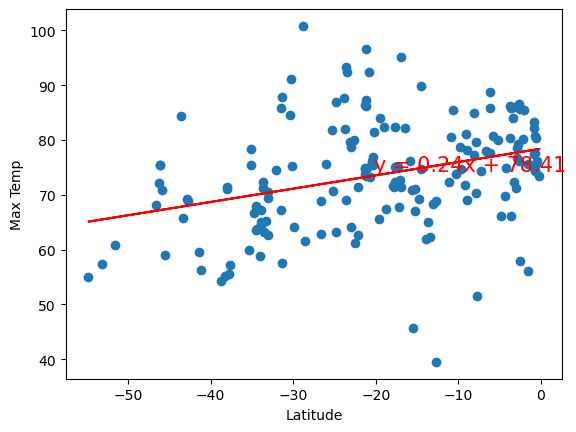

None


In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** There is a clear relationship between Latitude and Temperature; as the location goes further from the Latitude 0, temperature decreases.  It seems that, at 0 Latitude, the temperature is usually the highest.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4127954116722934


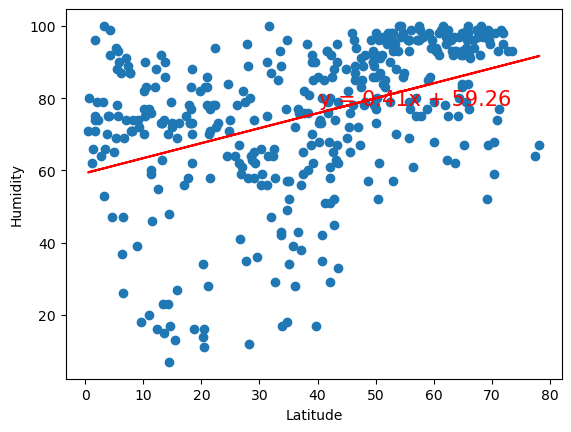

None


In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.3234957152727772


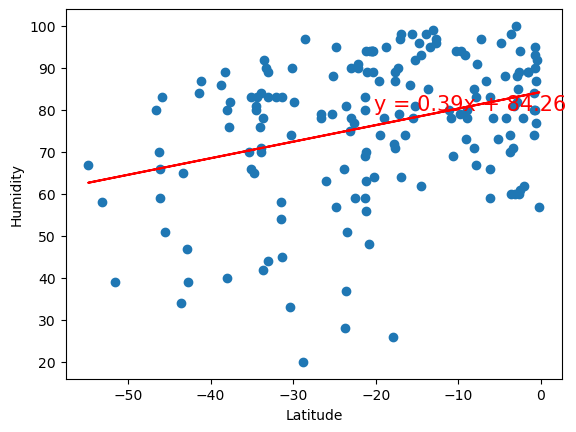

None


In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** As we move from lower Latitude to higher latitude, the humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.27449889835187113


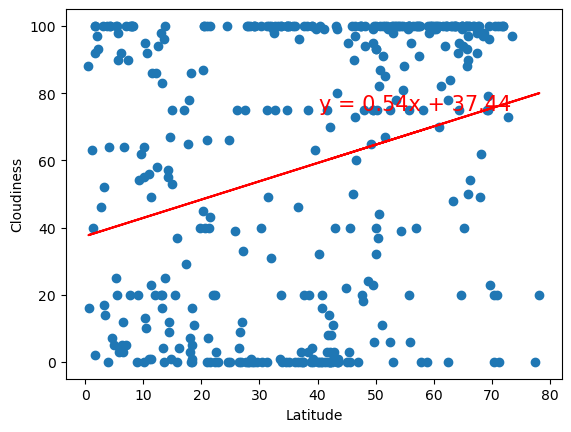

None


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.22860591187407175


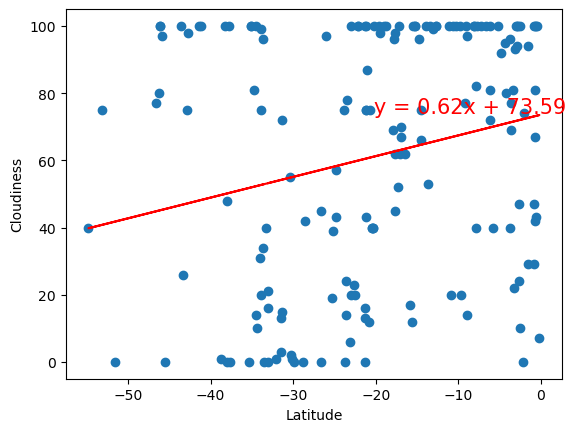

None


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** As latitude increases, the cloudiness general increases but very weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03521589108509792


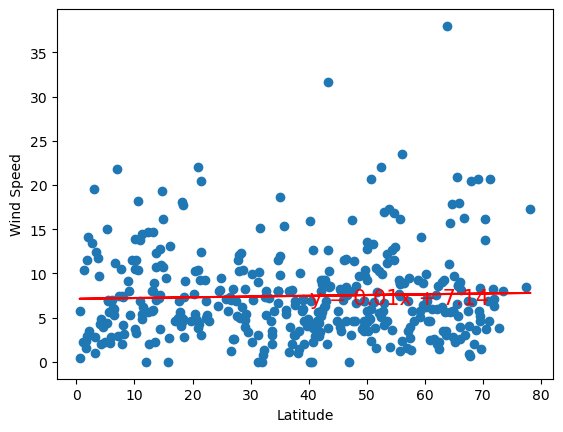

None


In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.41341812930977795


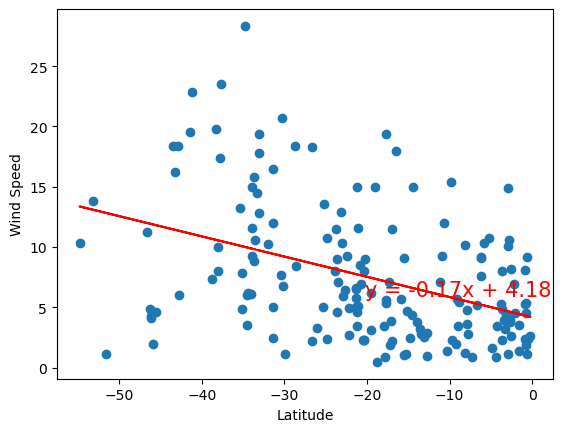

None


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Below 0, Wind is strong as it goes further from 0 Latitude.  In the Northern Hemisphere, however, the wind speed remained rather constant.